## From section 8.3 of the textbook solve the following exercises:
Q1
Q2

In [10]:
import pandas as pd

df = pd.read_csv("movies_metadata.csv", encoding="utf-8")

movie_list = []
genre_list = []

#function to extract genres from each row
def map_genres(row):
    try:
        glist = eval(row.genres)   #genres column has a list-like string
    except:
        glist = []
        print(f"bad data for {row.title}")
    for g in glist:
        movie_list.append(row.imdb_id)
        genre_list.append(g['name'])

#apply function across all rows
_ = df.apply(map_genres, axis=1)

#create tidy dataframe of movie–genre pairs
movies_genres = pd.DataFrame({
    'imdb_id': movie_list,
    'genre': genre_list
})

#Q-1: How many movies are in the Family genre?
family_movies_count = movies_genres[movies_genres['genre'] == 'Family']['imdb_id'].nunique()
print("Number of Family movies:", family_movies_count)

bad data for Nana
Number of Family movies: 2767


In [11]:
# Q-2: Which genre has the most movies?
genre_counts = movies_genres.groupby('genre')['imdb_id'].nunique()
most_common_genre = genre_counts.idxmax()
most_common_count = genre_counts.max()

print("Most common genre:", most_common_genre, "with", most_common_count, "movies")

Most common genre: Drama with 20236 movies


## From section 8.5 of the textbook solve the  following exercises:
Q1
Q2
Q3

In [13]:
import pandas as pd
undf = pd.read_csv("C:/Users/bibia/OneDrive/Documents/Uni_Docs/Data_Science_Projects/un-general-debates.csv", encoding="utf-8")

#clean up text
undf['text'] = undf['text'].str.replace('\ufeff','', regex=True)  # remove strange char
undf['text'] = undf['text'].str.strip()  # remove leading/trailing whitespace

#Q-1: How many rows have a country code starting with 'M'?
rows_starting_M = undf[undf['country'].str.startswith('M')].shape[0]
print("Rows with country code starting with M:", rows_starting_M)

#Q-2: How many unique country codes start with 'M'?
codes_starting_M = undf[undf['country'].str.startswith('M')]['country'].nunique()
print("Unique country codes starting with M:", codes_starting_M)

#Q-3: Most common word that follows 'global'
#lowercase text
undf['text'] = undf['text'].str.lower()

#extract ALL words following 'global'
following_words = undf['text'].str.extractall(r'global\s+(\w+)')[0]

word_counts = following_words.value_counts()

#most common word and how many times it occurs
most_common_word = word_counts.idxmax()
most_common_count = word_counts.max()

print("Most common word after 'global':", most_common_word)
print("Occurrences:", most_common_count)


Rows with country code starting with M: 663
Unique country codes starting with M: 18
Most common word after 'global': economic
Occurrences: 1038


## From section 8.6 of the textbook solve the  following exercises:
Q1
Q2

In [20]:
import pandas as pd

undf = pd.read_csv("C:/Users/bibia/OneDrive/Documents/Uni_Docs/Data_Science_Projects/un-general-debates.csv", encoding="utf-8")

#Q-1: What is the length of the resulting string for MEX?
#keep only 2014 and 2015
undf_filtered = undf[undf['year'].isin([2014, 2015])]

countries = ['USA', 'CAN', 'CUB', 'MEX']
undf_filtered = undf_filtered[undf_filtered['country'].isin(countries)]

#combine all speeches for each country into one string
# Using sum() to concatenate text
combined_texts = undf_filtered.groupby('country')['text'].sum()


#add country names as new column
country_names = {'USA': 'United States', 'CAN': 'Canada', 'CUB': 'Cuba', 'MEX': 'Mexico'}
combined_df = combined_texts.reset_index()
combined_df['country_name'] = combined_df['country'].map(country_names)

mex_length = len(combined_texts['MEX'])
print("Length of MEX combined string:", mex_length)

Length of MEX combined string: 19202


In [21]:
#Q-2: If we consider all of the years starting with 2000 and after, how many times does Mexico refer to Canada?

#filter years 2000 and later
undf_2000 = undf[undf['year'] >= 2000]
undf_2000 = undf_2000[undf_2000['country'].isin(countries)]

#combine texts by country
combined_texts_2000 = undf_2000.groupby('country')['text'].apply(lambda x: ' '.join(x))

mex_to_can = combined_texts_2000['MEX'].count("Canada")
print("Mexico refers to Canada since 2000:", mex_to_can)


Mexico refers to Canada since 2000: 3


## Sentiment Analysis:

#### Step 0.
Load the data from un-general-debates.csv into a data frame. Prepare the data and libraries for generating histograms and performing sentiment analysis.



In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

%matplotlib inline

nltk.download('vader_lexicon')

df = pd.read_csv("C:/Users/bibia/OneDrive/Documents/Uni_Docs/Data_Science_Projects/un-general-debates.csv")

sia = SentimentIntensityAnalyzer()

#add sentiment score column
df["sentiment"] = df["text"].apply(lambda x: sia.polarity_scores(str(x))["compound"])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bibia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### Step 1.
Generate the collective histogram of sentiment of all UN speeches overs years since 2003. This restriction is to allow google collab to successfully complete the computations. Make a copy of the UN dataframe and modify it as necessary to complete this task. You will not need to try any of the other tricks the book indicates to allow colab to complete the computation if you limit the data to just these years.

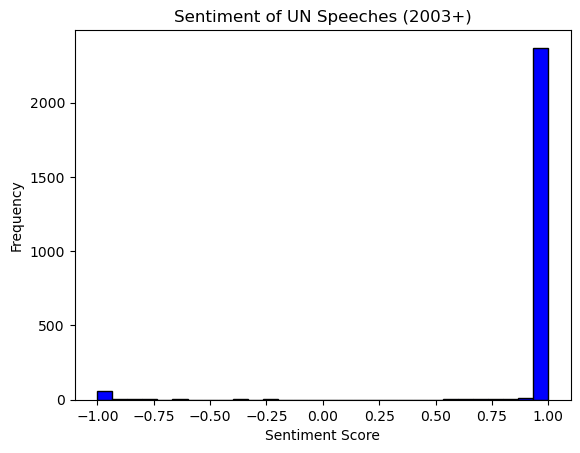

In [18]:
#data set speeches from 2003 and onward
df_2003 = df[df["year"] >= 2003]

#histogram
plt.hist(df_2003["sentiment"], bins=30, color="blue", edgecolor="black")
plt.title("Sentiment of UN Speeches (2003+)")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

#### Step 2.

Generate histogram over the years for 'sentiment'. Create another copy of the UN dataframe but with only 'year' and 'sentiment' as columns. Calculate the average sentiment for each year for the histogram. 

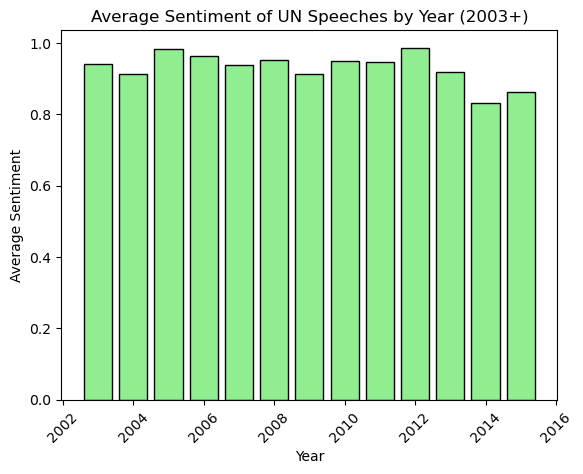

In [19]:
#only keep year and sentiment columns, group by year and avg sentiment
df_yearly = df_2003[["year", "sentiment"]].groupby("year").mean().reset_index()

#bar chart
plt.bar(df_yearly["year"], df_yearly["sentiment"], color="lightgreen", edgecolor="black")
plt.title("Average Sentiment of UN Speeches by Year (2003+)")
plt.xlabel("Year")
plt.ylabel("Average Sentiment")
plt.xticks(rotation=45)
plt.show()